# Notebook Imports and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV




%matplotlib inline

In [2]:
df_train = pd.read_csv(r"C:\Users\Parth\Downloads\o3j4hrcekn (2)\Dataset\train.csv")
df_test = pd.read_csv(r"C:\Users\Parth\Downloads\o3j4hrcekn (2)\Dataset\test.csv")
df_train_label = pd.read_csv(r"C:\Users\Parth\Downloads\o3j4hrcekn (2)\Dataset\train_label.csv",header = None)
df_test_label = pd.read_csv(r"C:\Users\Parth\Downloads\o3j4hrcekn (2)\Dataset\test_label.csv", header = None)

In [3]:
df_train['Total_booking'] = df_train_label[0]
df_test['Total_booking'] = df_test_label[0]

In [4]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [5]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


In [6]:
print(df_train.shape)
print(df_test.shape)

(8708, 10)
(2178, 10)


In [7]:
df_train['Date'] = df_train.datetime.apply(lambda x : x.split()[0])
df_train['Hour'] = df_train.datetime.apply(lambda x : x.split()[1].split(':')[0])
df_train['Weekday'] = df_train.Date.apply(lambda datestring : calendar.day_name[datetime.strptime(datestring,"%m/%d/%Y").weekday()])
df_train['Month'] = df_train.Date.apply(lambda datestring : calendar.month_name[datetime.strptime(datestring,"%m/%d/%Y").month])


df_test['Date'] = df_test.datetime.apply(lambda x : x.split()[0])
df_test['Hour'] = df_test.datetime.apply(lambda x : x.split()[1].split(':')[0])
df_test['Weekday'] = df_test.Date.apply(lambda datestring : calendar.day_name[datetime.strptime(datestring,"%m/%d/%Y").weekday()])
df_test['Month'] = df_test.Date.apply(lambda datestring : calendar.month_name[datetime.strptime(datestring,"%m/%d/%Y").month])

# Visualization of Data

In [8]:
df_train.dtypes.value_counts()

object     7
int64      4
float64    3
dtype: int64

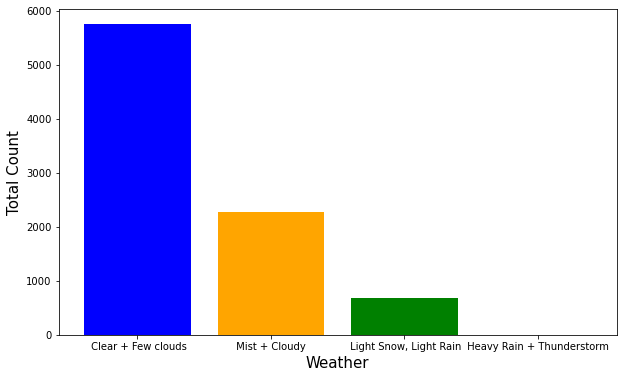

In [9]:
weather_data = df_train.weather.value_counts()

plt.figure(figsize=(10,6))
plt.xlabel('Weather', fontsize = 15)
plt.ylabel('Total Count', fontsize = 15)
color = ['blue', 'orange', 'green', 'red']
plt.bar(weather_data.index, height = weather_data, color = color)
plt.show()


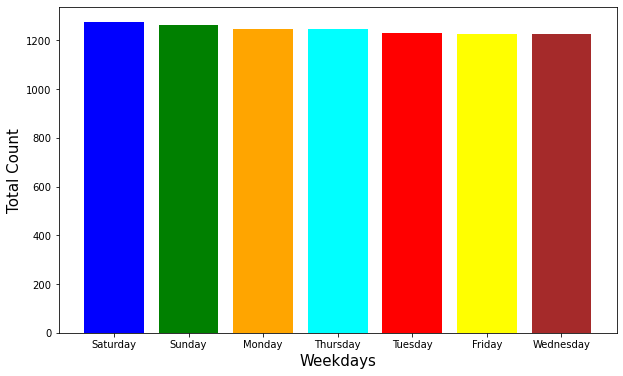

In [10]:
frequency = df_train['Weekday'].value_counts()

plt.figure(figsize=(10,6))
plt.xlabel('Weekdays', fontsize = 15)
plt.ylabel('Total Count', fontsize = 15)
color = ['blue', 'green', 'orange', 'cyan', 'red', 'yellow', 'brown']
plt.bar(frequency.index, height = frequency, color = color)
plt.show()


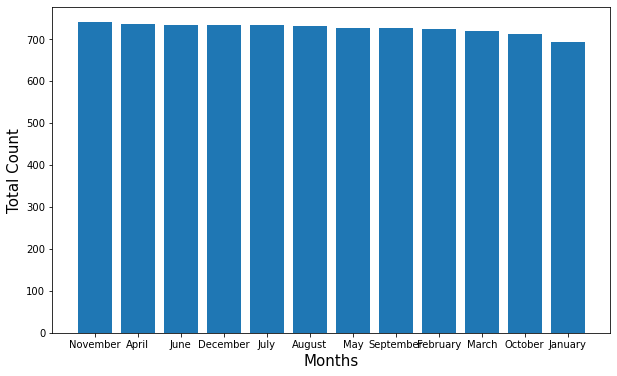

In [11]:
frequency1 = df_train['Month'].value_counts()

plt.figure(figsize=(10,6))
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Total Count', fontsize = 15)
plt.bar(frequency1.index, height = frequency1)
plt.show()


In [12]:
df_train['season'].value_counts()

Summer    2197
Fall      2189
Winter    2186
Spring    2136
Name: season, dtype: int64

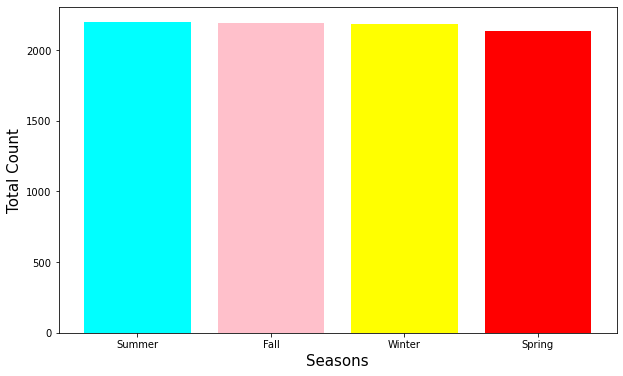

In [13]:
frequency2 = df_train['season'].value_counts()

plt.figure(figsize=(10,6))
plt.xlabel('Seasons', fontsize = 15)
plt.ylabel('Total Count', fontsize = 15)
color = ['cyan', 'pink', 'yellow', 'red']
plt.bar(frequency2.index, height = frequency2, color=color)
plt.show()


In [14]:
df_train['holiday'].value_counts()

0    8460
1     248
Name: holiday, dtype: int64

# Missing Value Analysis

In [15]:
df_train.isna().sum()


datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
Date             0
Hour             0
Weekday          0
Month            0
dtype: int64

# Outlier Analysis

<AxesSubplot:>

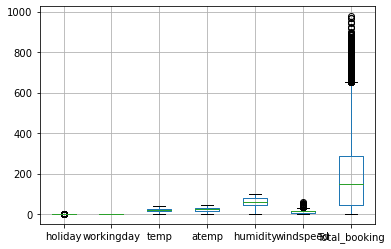

In [16]:
df_train.boxplot()
# This boxplot is showing that there is outliers in Total_booking

# Visualization w.r.t Target feature

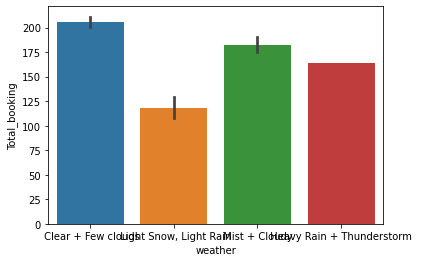

In [17]:
sns.barplot(x = 'weather', y = 'Total_booking', data = df_train)
plt.show()

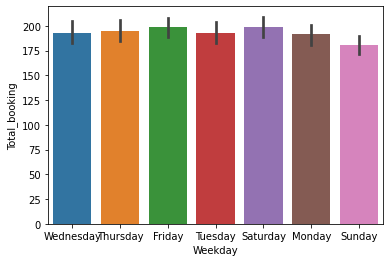

In [18]:
sns.barplot(x = 'Weekday', y = 'Total_booking', data = df_train)
plt.show()

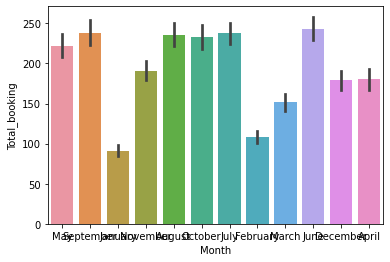

In [19]:
sns.barplot(x = 'Month', y = 'Total_booking', data = df_train)
plt.show()

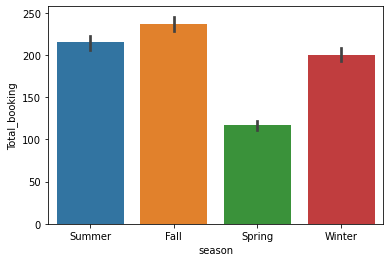

In [20]:
sns.barplot(x = 'season', y ='Total_booking', data = df_train)
plt.show()

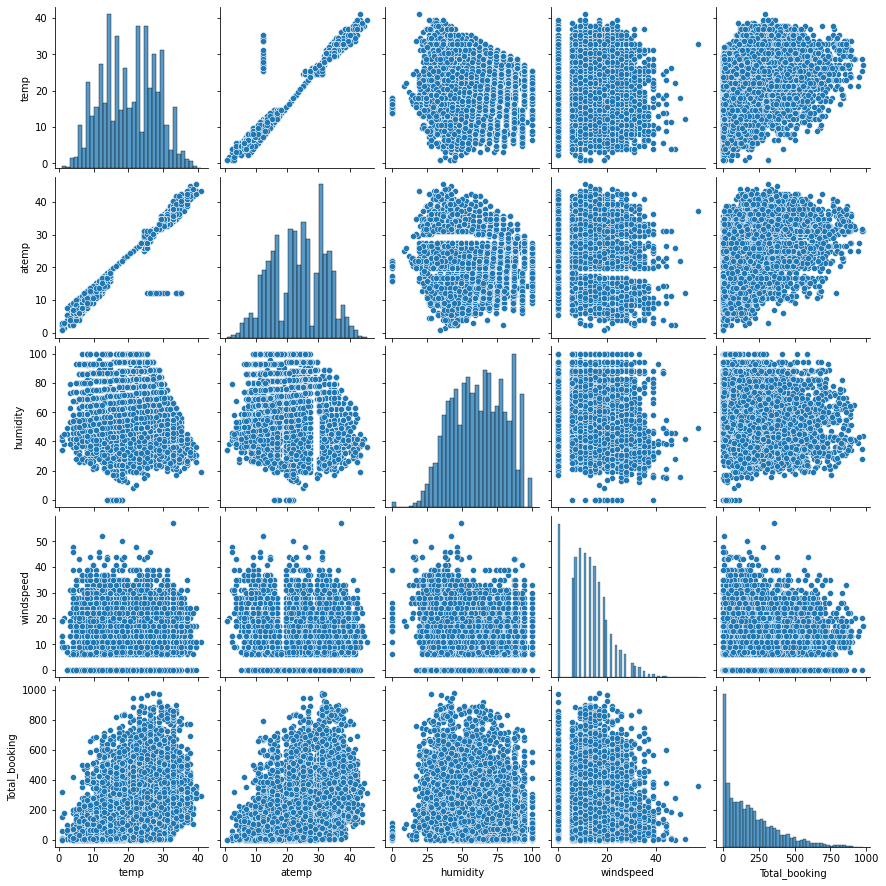

In [21]:
sns.pairplot(df_train[["temp","atemp", "humidity","windspeed", "Total_booking"]])
plt.show()

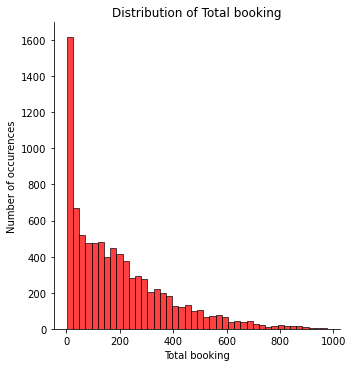

In [22]:
# Visualizing target variables
sns.displot(df_train['Total_booking'], color='red', kde=False)
plt.title('Distribution of Total booking')
plt.ylabel("Number of occurences")
plt.xlabel("Total booking")
plt.show()

# Correlation Analysis

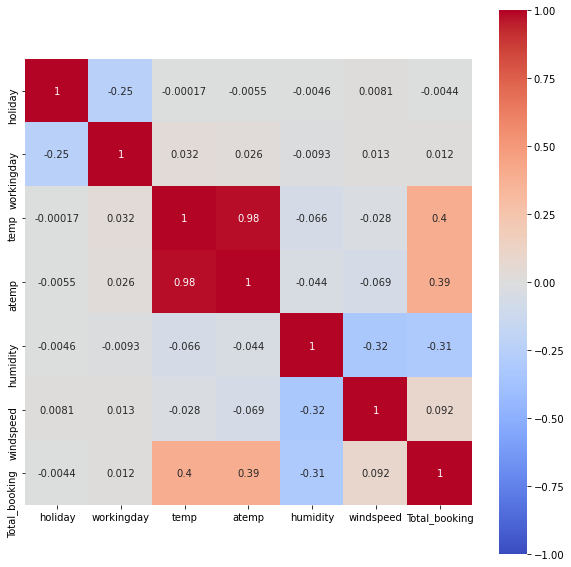

In [23]:
# heatmap showing multicollinearity
corr = df_train.corr()
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(corr, cmap = "coolwarm", annot = True, vmax = 1, vmin = -1, square = True)
plt.show()

# It is clearly showing that there is a chance of multicollinearity as Temp and atemp are higly correlated to each other

# Feature Engineering

In [24]:
# null values
df_train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
Date             0
Hour             0
Weekday          0
Month            0
dtype: int64

In [25]:
# Detecting Outliers
q1 = df_train["Total_booking"].quantile(0.25)
q3 = df_train["Total_booking"].quantile(0.75)
iqr = q3-q1
print(iqr)
lower_bound  = q1-1.5*iqr
upper_bound = q3+1.5*iqr
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower_bound,upper_bound))

243.0
The upper and lower bounds for suspected outliers are -321.5 and 650.5


In [26]:
outliers=df_train[df_train.Total_booking > upper_bound].index.tolist()
df_train[df_train.Total_booking > upper_bound]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Date,Hour,Weekday,Month
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,8/17/2012,17,Friday,August
27,5/2/2012 18:00,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,813,5/2/2012,18,Wednesday,May
30,7/10/2012 17:00,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,872,7/10/2012,17,Tuesday,July
52,6/5/2012 18:00,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,790,6/5/2012,18,Tuesday,June
70,5/18/2012 18:00,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,669,5/18/2012,18,Friday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,3/14/2012 8:00,Spring,0,1,Clear + Few clouds,18.04,21.970,82,0.0000,662,3/14/2012,8,Wednesday,March
8582,10/15/2012 8:00,Winter,0,1,Mist + Cloudy,24.60,30.305,64,26.0027,737,10/15/2012,8,Monday,October
8676,5/12/2012 13:00,Summer,0,0,Clear + Few clouds,26.24,31.060,36,12.9980,659,5/12/2012,13,Saturday,May
8681,8/8/2012 17:00,Fall,0,1,Mist + Cloudy,32.80,37.880,55,19.0012,858,8/8/2012,17,Wednesday,August


In [27]:
# Data with Outliers
df_train.shape

(8708, 14)

In [28]:
for index in outliers:
    df_train.drop(index, inplace=True)

In [29]:
# Data after removing outliers
df_train.shape

(8466, 14)

## Encoding Categorical Data

In [30]:
df_train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
Date              object
Hour              object
Weekday           object
Month             object
dtype: object

In [31]:
df_train.dtypes.value_counts()

object     7
int64      4
float64    3
dtype: int64

In [32]:
# Categorical Columns
columns = df_train.columns

cat_column= [col for col in df_train.columns if df_train[col].dtypes=='O']
cat_column

['datetime', 'season', 'weather', 'Date', 'Hour', 'Weekday', 'Month']

In [33]:
# No. of unique values in categorical features
for col in cat_column:
    print("Unique Values in {} - {}".format(col,len(df_train[col].unique())))
    print()
    

Unique Values in datetime - 8466

Unique Values in season - 4

Unique Values in weather - 4

Unique Values in Date - 456

Unique Values in Hour - 24

Unique Values in Weekday - 7

Unique Values in Month - 12



In [34]:
# Removing Column that are of less importance
del(df_train["datetime"])
del(df_train["Date"])
del(df_train["atemp"])    # Removing atemp feature to avoid multicollinearity

In [35]:
df_train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,Total_booking,Hour,Weekday,Month
0,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,504,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,79,19.0012,5,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,139,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,29,8.9981,209,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,51,19.0012,184,13,Tuesday,September


In [36]:
df_train = pd.get_dummies(df_train)


In [37]:
df_train.head()

,holiday,workingday,temp,humidity,windspeed,Total_booking,season_Fall,season_Spring,season_Summer,season_Winter,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0,1,22.14,77,16.9979,504,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,28.70,79,19.0012,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,5.74,50,22.0028,139,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,13.94,29,8.9981,209,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,30.34,51,19.0012,184,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
df_train.shape

(8466, 57)

## Splitting of data into X & y

In [39]:
X = df_train.drop('Total_booking', axis = 1)
y = df_train['Total_booking']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)

(6772, 56)
(1694, 56)


# Model Building

In [41]:
# Linear Regression Model

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred_lr = regr.predict(X_test)
print(y_pred_lr)

# Decision Tree Model

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(y_pred_dt)

# Randon Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
print(y_pred_rf)

# XG Boost Model

xg_model = XGBRFRegressor()
xg_model.fit(X_train, y_train)
y_pred_xgb = xg_model.predict(X_test)
print(y_pred_xgb)

#SVM Model

SVM_model = SVR()
SVM_model.fit(X_train, y_train)
y_pred_SVM = SVM_model.predict(X_test)
print(y_pred_SVM)

# KNN Model

KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, y_train)
y_pred_KNN = KNN_model.predict(X_test)
print(y_pred_KNN)

# Gradient Boosting Model
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB = GB_model.predict(X_test)
print(y_pred_GB)





[118.109375    87.140625   243.95117188 ... 255.19921875  86.66015625
  71.3515625 ]
[187.  31. 270. ... 358.  56.  67.]
[147.73  36.17 241.92 ... 366.04  67.19  67.23]
[239.58228 141.66235 146.8878  ... 155.21295  83.24101 136.8993 ]
[175.54500101  70.44096344 138.66364219 ...  83.94295534 123.47236736
 133.90697425]
[168.6 147.4  51.6 ... 216.  141.4 116. ]
[148.0268357   65.40462952 210.22314674 ... 231.71764329 115.84597721
  73.36340545]


# Performance Metrics

In [42]:
print("R squared value for LR :" , r2_score(y_test, y_pred_lr))
print("R squared value for DT :", r2_score(y_test, y_pred_dt))
print("R squared value for RF:", r2_score(y_test, y_pred_rf))
print("R squared value for XG:", r2_score(y_test, y_pred_xgb))
print("R squared value for SVM:", r2_score(y_test, y_pred_SVM))
print("R squared value for KNN:", r2_score(y_test, y_pred_KNN))
print("R squared value for GB:", r2_score(y_test, y_pred_GB))

print("MSE for LR :", mean_squared_error(y_test, y_pred_lr))
print("MSE for DT :", mean_squared_error(y_test, y_pred_dt))
print("MSE for RF:", mean_squared_error(y_test, y_pred_rf))
print("MSE for XG:", mean_squared_error(y_test, y_pred_xgb))
print("MSE for SVM:", mean_squared_error(y_test, y_pred_SVM))
print("MSE for KNN:", mean_squared_error(y_test, y_pred_KNN))
print("MSE for GB:", mean_squared_error(y_test, y_pred_GB))


R squared value for LR : 0.6255747430651097
R squared value for DT : 0.6313409281567126
R squared value for RF: 0.8168429255404657
R squared value for XG: 0.4740239402550359
R squared value for SVM: 0.14094842822370346
R squared value for KNN: 0.2166808625821648
R squared value for GB: 0.7093572975813494
MSE for LR : 9283.921336497157
MSE for DT : 9140.948051948051
MSE for RF: 4541.40269656264
MSE for XG: 13041.642552447025
MSE for SVM: 21300.291763576824
MSE for KNN: 19422.496528925618
MSE for GB: 7206.522360084589


### Here we can see that the RandomForestRegressor has the highest r_score value. 

## Grid CV Research

In [43]:
grid_param = {'n_estimators' : [200, 500, 1000, 1200],
             'max_depth' : [10,20,30]
             }

gridsearch_cv = GridSearchCV(estimator = rf_model, param_grid = grid_param, cv = 5,
                            n_jobs = -1, verbose = 3)
gridsearch_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.5min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [200, 500, 1000, 1200]},
             verbose=3)

In [44]:
print("Best parameters for random forest: ", gridsearch_cv.best_params_)
CV_grid_model = gridsearch_cv.best_estimator_

y_train_pred = CV_grid_model.predict(X_train)
y_pred_test = CV_grid_model.predict(X_test)
print("r-sqaure value : ", r2_score(y_test, y_pred_test))
print("MSE Value : ", mean_squared_error(y_test, y_pred_test))



Best parameters for random forest:  {'max_depth': 30, 'n_estimators': 1000}
r-sqaure value :  0.8198382745797047
MSE Value :  4467.132640415002


In [45]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Date,Hour,Weekday,Month
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,5/10/2012,11,Thursday,May
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,6/9/2012,7,Saturday,June
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,3/6/2011,20,Sunday,March
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,10/13/2011,11,Thursday,October
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,6/2/2012,12,Saturday,June


In [48]:
del(df_test["datetime"])
del(df_test["atemp"])
del(df_test["Date"])

In [49]:
df_test = pd.get_dummies(df_test)
df_test.shape

(2178, 56)

In [50]:
Pred = CV_grid_model.predict(df_test)
print("r-sqaure score for actual value vs predicted value: ", r2_score(df_test_label, Pred))
print("MSE Value for actual value vs predicted value: ", mean_squared_error(df_test_label, Pred))

r-sqaure score for actual value vs predicted value:  0.7889998365034621
MSE Value for actual value vs predicted value:  6790.207969791077


In [53]:
Prediction = pd.DataFrame(Pred, columns = ['Predicted_value'])
Prediction

,Predicted_value
0,212.626536
1,121.734958
2,75.093000
3,162.795077
4,418.494250
...,...
2173,7.930038
2174,142.291398
2175,131.383261
2176,22.862886


In [55]:
# Merging prediction data with the actual data
df_test = pd.read_csv(r"C:\Users\Parth\Downloads\o3j4hrcekn (2)\Dataset\test.csv")
df_test_label = pd.read_csv(r"C:\Users\Parth\Downloads\o3j4hrcekn (2)\Dataset\test_label.csv", header = None)
df_test['Total_booking'] = df_test_label[0]

In [58]:
df_test['Prediction'] = Prediction

In [59]:
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Prediction
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,212.626536
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,121.734958
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,75.093000
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,162.795077
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,418.494250
...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,7.930038
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,142.291398
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,131.383261
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,22.862886
